# Email_Spam_Filter

[Dataset](https://www.kaggle.com/datasets/jackksoncsie/spam-email-dataset)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

In [ ]:
data=pd.read_csv('/content/archive (31).zip')

In [ ]:
X = data['text']
y = data['spam']

In [ ]:
# Preprocessing: Handling missing values and converting text to lower case
data['text'] = data['text'].fillna('').str.lower()

In [ ]:
# Feature extraction: TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['text'])

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['spam'], test_size=0.2, random_state=42)

# Model training: Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Model prediction
y_pred = model.predict(X_test)

In [ ]:
# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9781849912739965
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       856
           1       0.99      0.93      0.96       290

    accuracy                           0.98      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146

Confusion Matrix:
 [[852   4]
 [ 21 269]]


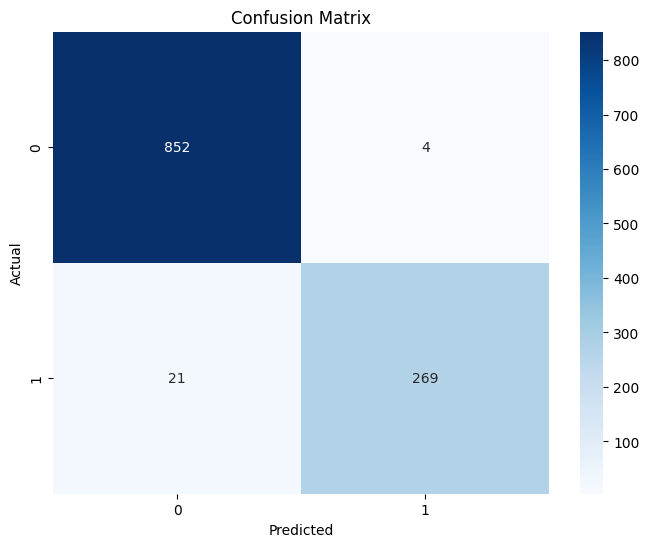

In [ ]:
# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Feature importance: Identifying the most indicative words for spam and ham
feature_names = tfidf_vectorizer.get_feature_names_out()
# Access feature log probabilities instead of coefficients
sorted_features = model.feature_log_prob_[0].argsort()

In [ ]:
print("Top 10 words indicative of spam:")
print([feature_names[i] for i in sorted_features[-10:]])

Top 10 words indicative of spam:
['research', 'pm', 'com', 'kaminski', '2000', 'hou', 'subject', 'vince', 'enron', 'ect']


In [ ]:
print("Top 10 words indicative of ham:")
print([feature_names[i] for i in sorted_features[:10]])

Top 10 words indicative of ham:
['homeland', 'dvd', 'spam', 'spamassassin', 'wili', 'vnbl', 'dysfunction', 'wiil', 'wiii', 'errrectlon']


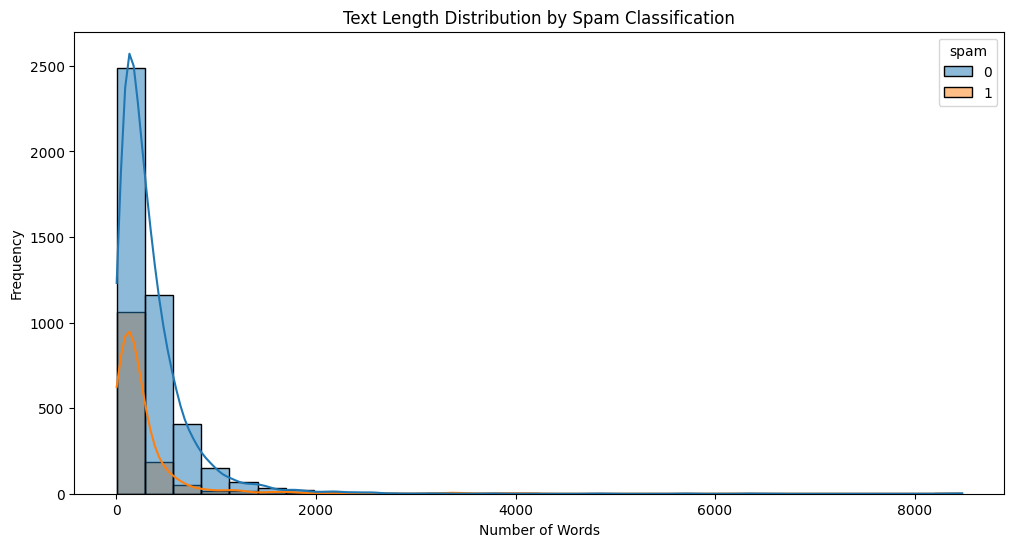

In [ ]:
# Additional insights: Text length analysis
data['text_length'] = data['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 6))
sns.histplot(data, x='text_length', hue='spam', bins=30, kde=True)
plt.title('Text Length Distribution by Spam Classification')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

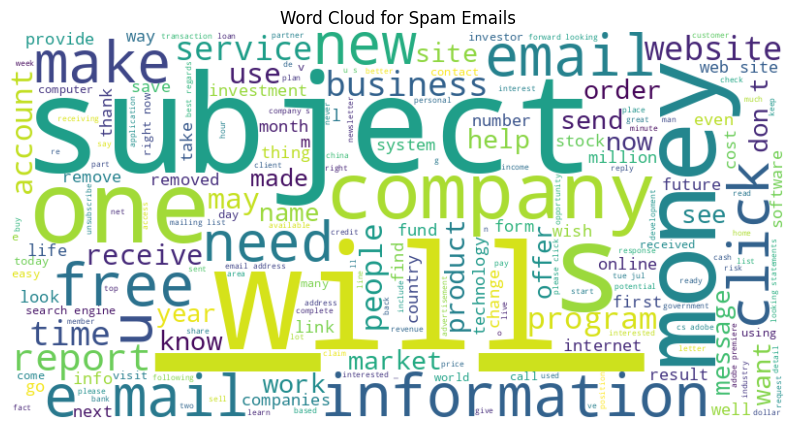

In [ ]:
# Generating word cloud for spam emails
spam_words = ' '.join(list(data[data['spam'] == 1]['text']))
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.show()


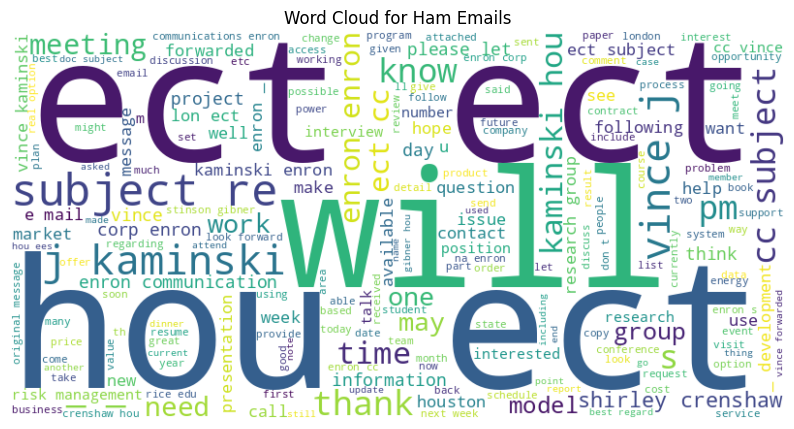

In [ ]:
# Generating word cloud for ham emails
ham_words = ' '.join(list(data[data['spam'] == 0]['text']))
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)

plt.figure(figsize=(10, 6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Emails')
plt.show()


<Figure size 1000x600 with 0 Axes>

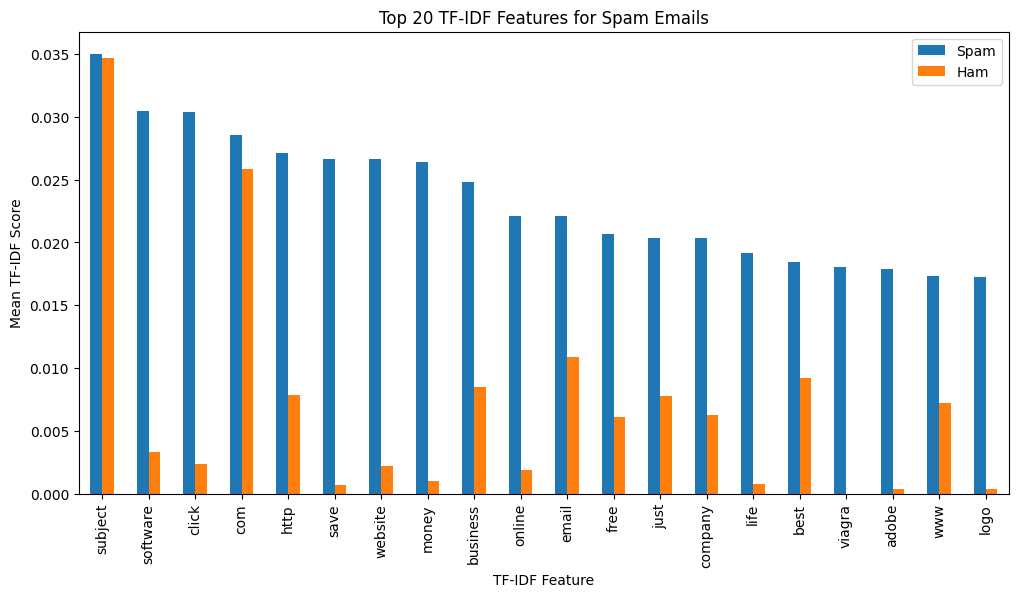

In [ ]:
# Plotting the distribution of TF-IDF features for spam vs. ham
spam_tfidf = X_tfidf[data['spam'] == 1].mean(axis=0).A1
ham_tfidf = X_tfidf[data['spam'] == 0].mean(axis=0).A1
tfidf_df = pd.DataFrame({'Spam': spam_tfidf, 'Ham': ham_tfidf}, index=tfidf_vectorizer.get_feature_names_out())

plt.figure(figsize=(10, 6))
tfidf_df.sort_values('Spam', ascending=False).head(20).plot(kind='bar', figsize=(12, 6))
plt.title('Top 20 TF-IDF Features for Spam Emails')
plt.xlabel('TF-IDF Feature')
plt.ylabel('Mean TF-IDF Score')
plt.show()


In [ ]:
# Function to plot top N-grams
def plot_top_ngrams(corpus, ngram_range, n=20):
    vec = CountVectorizer(stop_words='english', ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    words_df = pd.DataFrame(words_freq[:n], columns=['N-gram', 'Frequency'])
    plt.figure(figsize=(12, 6))

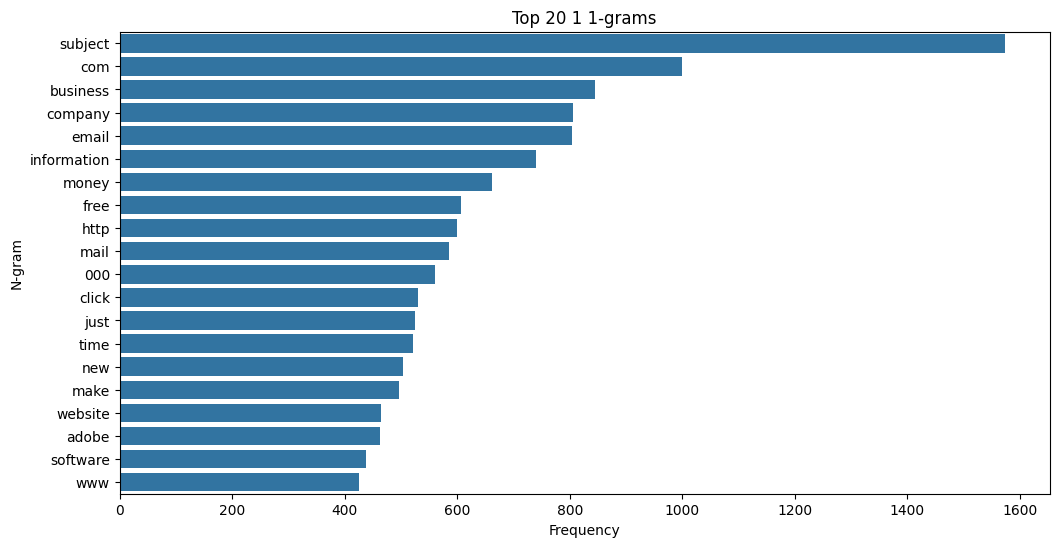

In [ ]:
# Plotting top unigrams and bigrams for spam emails
plot_top_ngrams(data[data['spam'] == 1]['text'], (1, 1))

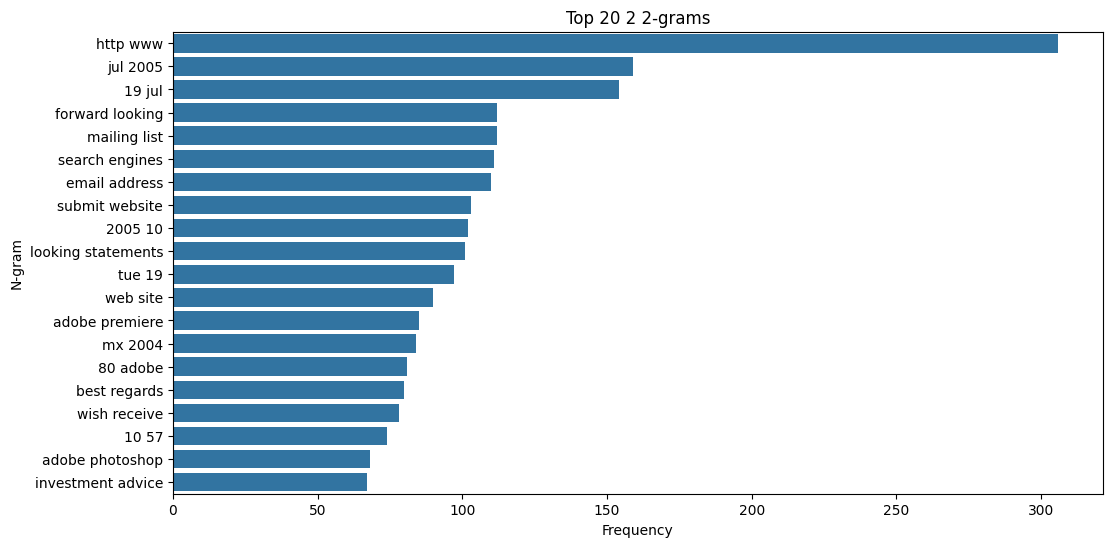

In [ ]:
plot_top_ngrams(data[data['spam'] == 1]['text'], (2, 2))

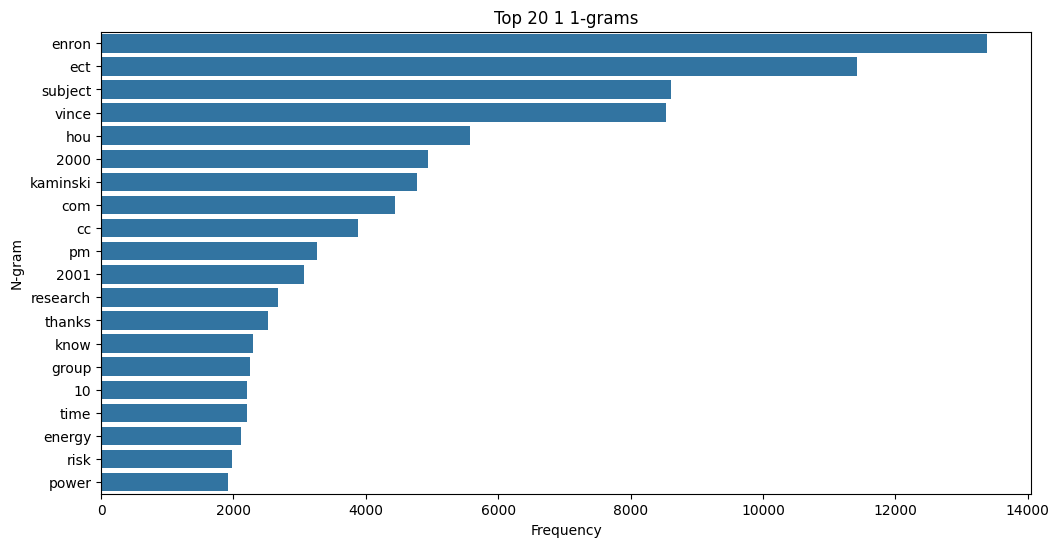

In [ ]:
# Plotting top unigrams and bigrams for ham emails
plot_top_ngrams(data[data['spam'] == 0]['text'], (1, 1))

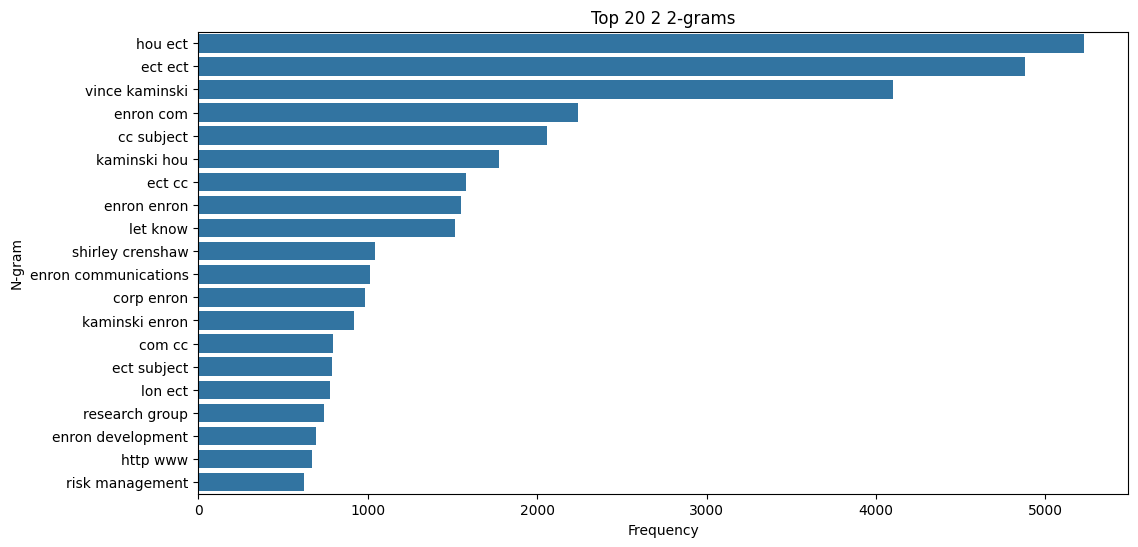

In [ ]:
plot_top_ngrams(data[data['spam'] == 0]['text'], (2, 2))

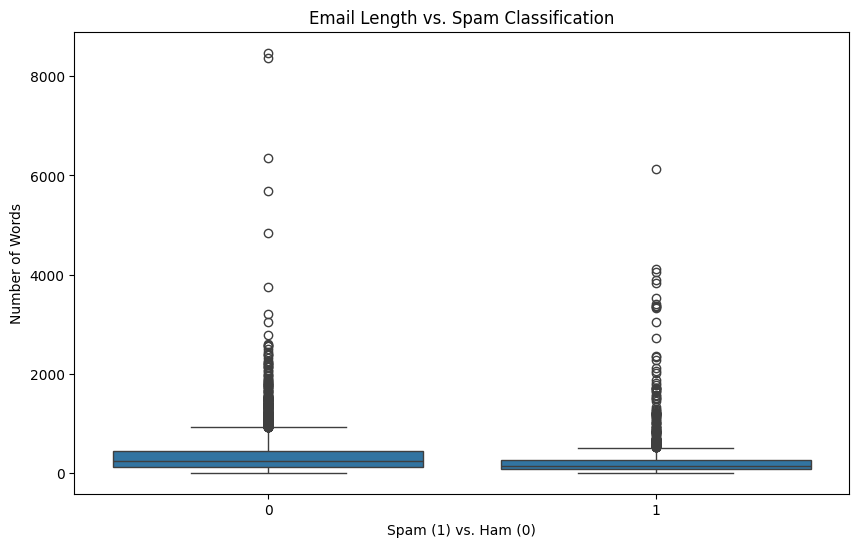

In [51]:
# Plotting the length of emails vs. spam classification
data['text_length'] = data['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='spam', y='text_length')
plt.title('Email Length vs. Spam Classification')
plt.xlabel('Spam (1) vs. Ham (0)')
plt.ylabel('Number of Words')
plt.show()